<a href="https://colab.research.google.com/github/edypj/NaturalLanguageProcessing/blob/main/PoemClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV


In [21]:
uploaded = files.upload()

Saving Poem_classification - test_data.csv to Poem_classification - test_data.csv
Saving Poem_classification - train_data.csv to Poem_classification - train_data.csv


In [22]:
for filename in uploaded.keys():
    with open(filename, 'wb') as f:
        f.write(uploaded[filename])

print('File berhasil diunggah dan disimpan!')

File berhasil diunggah dan disimpan!


In [24]:
# Membaca file train_data.csv
train_data = pd.read_csv("Poem_classification - train_data.csv")

# Menampilkan 5 data pertama dari train_data.csv
print("Isi dari train_data.csv:")
print(train_data.head(5))

# Membaca file test_data.csv
test_data = pd.read_csv("Poem_classification - test_data.csv")

# Menampilkan 5 data pertama dari test_data.csv
print("\nIsi dari test_data.csv:")
print(test_data.head(5))


Isi dari train_data.csv:
   Genre                                               Poem
0  Music                                                NaN
1  Music                In the thick brushthey spend the...
2  Music     Storms are generous.                       ...
3  Music   —After Ana Mendieta Did you carry around the ...
4  Music   for Aja Sherrard at 20The portent may itself ...

Isi dari test_data.csv:
   Genre                                               Poem
0  Music  A woman walks by the bench I’m sitting onwith ...
1  Music  Because I am a boy, the untouchability of beau...
2  Music  Because today we did not leave this world,We n...
3  Music  Big Bend has been here, been here. Shouldn’t i...
4  Music  I put shells there, along the lip of the road....


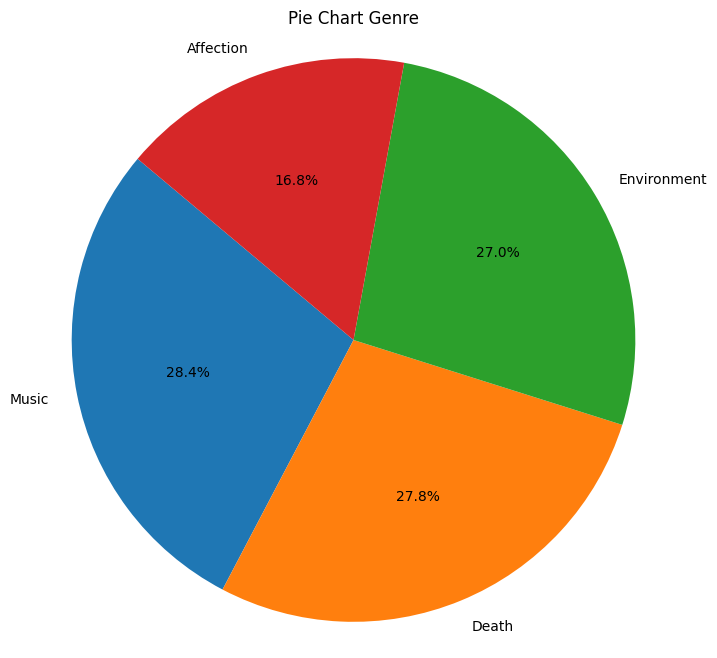

In [26]:
# Membaca file train_data.csv
train_data = pd.read_csv("Poem_classification - train_data.csv")

# Menghitung jumlah data untuk setiap genre
genre_counts = train_data['Genre'].value_counts()

# Plotting pie chart
plt.figure(figsize=(8, 8))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart Genre')
plt.axis('equal')
plt.show()

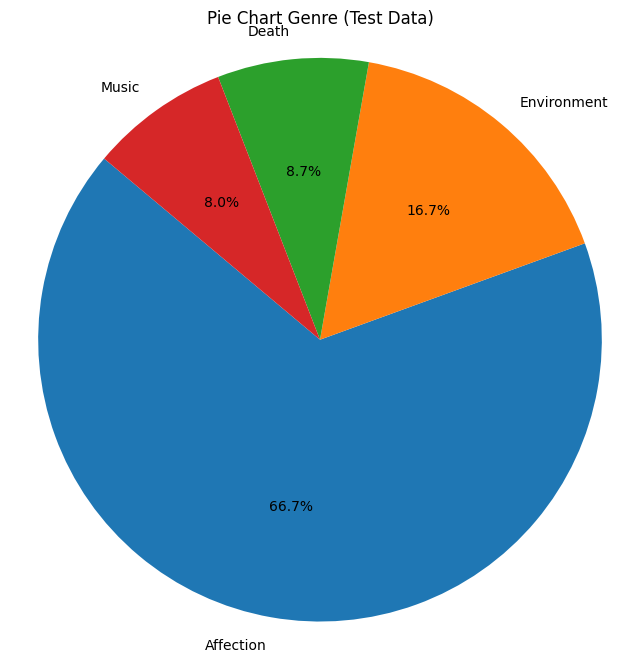

In [27]:
# Membaca file test_data.csv
test_data = pd.read_csv("Poem_classification - test_data.csv")

# Menghitung jumlah data untuk setiap genre di data test
test_genre_counts = test_data['Genre'].value_counts()

# Plotting pie chart untuk data test
plt.figure(figsize=(8, 8))
plt.pie(test_genre_counts, labels=test_genre_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart Genre (Test Data)')
plt.axis('equal')
plt.show()

In [28]:
import pandas as pd

# Membaca file train_data.csv
train_data = pd.read_csv("Poem_classification - train_data.csv")

# Menampilkan informasi tipe data dari train_data.csv
print("Info dari train_data.csv:")
print(train_data.info())

# Membaca file test_data.csv
test_data = pd.read_csv("Poem_classification - test_data.csv")

# Menampilkan informasi tipe data dari test_data.csv
print("\nInfo dari test_data.csv:")
print(test_data.info())

Info dari train_data.csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 841 entries, 0 to 840
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Genre   841 non-null    object
 1   Poem    837 non-null    object
dtypes: object(2)
memory usage: 13.3+ KB
None

Info dari test_data.csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Genre   150 non-null    object
 1   Poem    150 non-null    object
dtypes: object(2)
memory usage: 2.5+ KB
None


In [31]:
def clean_text(text):
    if isinstance(text, str):  # Memastikan nilai text adalah string
        # Mengubah teks menjadi huruf kecil
        text = text.lower()
        # Menghapus karakter khusus, angka, dan tanda baca menggunakan ekspresi reguler
        text = re.sub(r'[^a-z\s]', '', text)
    return text

# Membersihkan teks pada train_data.csv
train_data = pd.read_csv("Poem_classification - train_data.csv")
train_data['Poem'] = train_data['Poem'].apply(clean_text)

# Menampilkan beberapa baris pertama dari train_data setelah pembersihan teks
print("Train Data setelah membersihkan teks:")
print(train_data.head())

# Membersihkan teks pada test_data.csv
test_data = pd.read_csv("Poem_classification - test_data.csv")
test_data['Poem'] = test_data['Poem'].apply(clean_text)

# Menampilkan beberapa baris pertama dari test_data setelah pembersihan teks
print("\nTest Data setelah membersihkan teks:")
print(test_data.head())

Train Data setelah membersihkan teks:
   Genre                                               Poem
0  Music                                                NaN
1  Music                in the thick brushthey spend the...
2  Music     storms are generous                        ...
3  Music   after ana mendieta did you carry around the m...
4  Music   for aja sherrard at the portent may itself be...

Test Data setelah membersihkan teks:
   Genre                                               Poem
0  Music  a woman walks by the bench im sitting onwith h...
1  Music  because i am a boy the untouchability of beaut...
2  Music  because today we did not leave this worldwe no...
3  Music  big bend has been here been here shouldnt it h...
4  Music  i put shells there along the lip of the roadbi...


In [32]:
# Menghapus baris dengan nilai NaN di kolom 'Poem' pada train_data
train_data.dropna(subset=['Poem'], inplace=True)

# Menghapus baris dengan nilai NaN di kolom 'Poem' pada test_data
test_data.dropna(subset=['Poem'], inplace=True)


In [34]:
# Download data yang diperlukan oleh NLTK jika belum ada
nltk.download('punkt')

# Tokenisasi teks menggunakan NLTK
train_data['Poem'] = train_data['Poem'].apply(lambda x: word_tokenize(str(x)))
test_data['Poem'] = test_data['Poem'].apply(lambda x: word_tokenize(str(x)))

# Menampilkan beberapa baris pertama dari train_data setelah tokenisasi
print("Train Data setelah tokenisasi:")
print(train_data.head())

# Menampilkan beberapa baris pertama dari test_data setelah tokenisasi
print("\nTest Data setelah tokenisasi:")
print(test_data.head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Train Data setelah tokenisasi:
   Genre                                               Poem
1  Music  [in, the, thick, brushthey, spend, the, hottes...
2  Music  [storms, are, generous, something, so, easy, t...
3  Music  [after, ana, mendieta, did, you, carry, around...
4  Music  [for, aja, sherrard, at, the, portent, may, it...
5  Music  [for, bob, marley, bavaria, november, here, is...

Test Data setelah tokenisasi:
   Genre                                               Poem
0  Music  [a, woman, walks, by, the, bench, im, sitting,...
1  Music  [because, i, am, a, boy, the, untouchability, ...
2  Music  [because, today, we, did, not, leave, this, wo...
3  Music  [big, bend, has, been, here, been, here, shoul...
4  Music  [i, put, shells, there, along, the, lip, of, t...


In [36]:
# Pengkodean fitur
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(train_data['Poem'].apply(lambda x: ' '.join(x)))
y_train = train_data['Genre']

# Pembagian data menjadi set pelatihan dan set pengujian
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Pembuatan dan pelatihan model
clf = MultinomialNB()
clf.fit(X_train_split, y_train_split)

# Prediksi untuk set pengujian
y_pred = clf.predict(X_val_split)

# Evaluasi model
accuracy = accuracy_score(y_val_split, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_val_split, y_pred))

Accuracy: 0.4166666666666667

Classification Report:
              precision    recall  f1-score   support

   Affection       0.25      0.18      0.21        22
       Death       0.33      0.51      0.40        45
 Environment       0.74      0.46      0.57        54
       Music       0.37      0.38      0.37        47

    accuracy                           0.42       168
   macro avg       0.42      0.38      0.39       168
weighted avg       0.46      0.42      0.42       168



In [41]:
# 1. Pengkodean Fitur (TF-IDF)
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(train_data['Poem'].apply(lambda x: ' '.join(x)))
X_test_tfidf = tfidf_vectorizer.transform(test_data['Poem'].apply(lambda x: ' '.join(x)))

# 2. Pembagian Data
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train_tfidf, train_data['Genre'], test_size=0.2, random_state=42)

# 3. Pelatihan Model SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_split, y_train_split)

SVC(kernel='linear')

In [46]:
y_pred = svm_model.predict(X_val_split)
accuracy = accuracy_score(y_val_split, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_val_split, y_pred))

# Evaluasi pada data uji
y_pred_test = svm_model.predict(X_test_tfidf)
accuracy_test = accuracy_score(test_data['Genre'], y_pred_test)
print("\nAccuracy on Test Data:", accuracy_test)
print("\nClassification Report on Test Data:")
print(classification_report(test_data['Genre'], y_pred_test))

Accuracy: 0.4226190476190476

Classification Report:
              precision    recall  f1-score   support

   Affection       0.29      0.18      0.22        22
       Death       0.33      0.36      0.34        45
 Environment       0.58      0.56      0.57        54
       Music       0.40      0.45      0.42        47

    accuracy                           0.42       168
   macro avg       0.40      0.38      0.39       168
weighted avg       0.42      0.42      0.42       168


Accuracy on Test Data: 0.28

Classification Report on Test Data:
              precision    recall  f1-score   support

   Affection       0.88      0.23      0.37       100
       Death       0.08      0.23      0.12        13
 Environment       0.22      0.32      0.26        25
       Music       0.17      0.67      0.27        12

    accuracy                           0.28       150
   macro avg       0.34      0.36      0.25       150
weighted avg       0.65      0.28      0.32       150



In [49]:
# 3. Pelatihan Model SVM dengan Parameter Terbaik
best_svm_model = SVC(kernel='linear', C=4, gamma=0.1)
best_svm_model.fit(X_train_split, y_train_split)

# 5. Evaluasi Model dengan Parameter Terbaik
y_pred_best = best_svm_model.predict(X_val_split)
accuracy_best = accuracy_score(y_val_split, y_pred_best)
print("Accuracy with Best Parameters:", accuracy_best)
print("\nClassification Report with Best Parameters:")
print(classification_report(y_val_split, y_pred_best))

# Evaluasi pada data uji dengan parameter terbaik
y_pred_test_best = best_svm_model.predict(X_test_tfidf)
accuracy_test_best = accuracy_score(test_data['Genre'], y_pred_test_best)
print("\nAccuracy on Test Data with Best Parameters:", accuracy_test_best)
print("\nClassification Report on Test Data with Best Parameters:")
print(classification_report(test_data['Genre'], y_pred_test_best))

Accuracy with Best Parameters: 0.40476190476190477

Classification Report with Best Parameters:
              precision    recall  f1-score   support

   Affection       0.21      0.23      0.22        22
       Death       0.32      0.33      0.33        45
 Environment       0.55      0.54      0.54        54
       Music       0.43      0.40      0.42        47

    accuracy                           0.40       168
   macro avg       0.38      0.38      0.38       168
weighted avg       0.41      0.40      0.41       168


Accuracy on Test Data with Best Parameters: 0.31333333333333335

Classification Report on Test Data with Best Parameters:
              precision    recall  f1-score   support

   Affection       0.87      0.27      0.41       100
       Death       0.10      0.31      0.15        13
 Environment       0.26      0.36      0.31        25
       Music       0.16      0.58      0.25        12

    accuracy                           0.31       150
   macro avg       0

In [51]:
def predict_genre(poem_text):
    # Lakukan preprocessing pada teks puisi
    cleaned_text = clean_text(poem_text)
    tokenized_text = word_tokenize(cleaned_text)
    text_vectorized = tfidf_vectorizer.transform([' '.join(tokenized_text)])

    # Lakukan prediksi klasifikasi
    genre_pred = best_svm_model.predict(text_vectorized)

    return genre_pred[0]

# Contoh penggunaan
poem_example = "I wandered lonely as a cloud That floats on high o'er vales and hills, When all at once I saw a crowd, A host, of golden daffodils; Beside the lake, beneath the trees, Fluttering and dancing in the breeze."
predicted_genre = predict_genre(poem_example)
print("Predicted Genre:", predicted_genre)

Predicted Genre: Environment
